In [35]:
import pandas as pd

import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

from IPython.display import Image

import pydotplus

disease = pd.read_csv("heart-disease-dataset2.csv")
disease = disease.apply(pd.to_numeric, errors='coerce') #convert all string to NaN ('?' entries)
disease = disease.dropna(how="any", axis=0) #axis 0 or 'index' for rows, drop all rows with NaN

#converting to binary might be needed, due to classification
X = disease.drop("result", axis="columns") #our independant variables
y = disease["result"].apply(lambda x: 0 if x==0 else 1) #make the data binary, have disease or not

#do 80-20 train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

ds_gini = DecisionTreeClassifier(criterion='gini', random_state=5)

ds_gini.fit(X_train, Y_train)

y_pred = ds_gini.predict(X_test)

print("Actual: {}".format(np.array(Y_test)))
print("Predicted: {}".format(y_pred))
print()

g_score = ds_gini.score(X_test, Y_test)

print("Gini Decision Tree Accuracy Score: {}".format(round(g_score, 3)))
print()

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print()

print(classification_report(Y_test, y_pred))

Actual: [1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0]
Predicted: [0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0]

Gini Decision Tree Accuracy Score: 0.833

Confusion Matrix:
[[30  5]
 [ 5 20]]

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.80      0.80      0.80        25

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



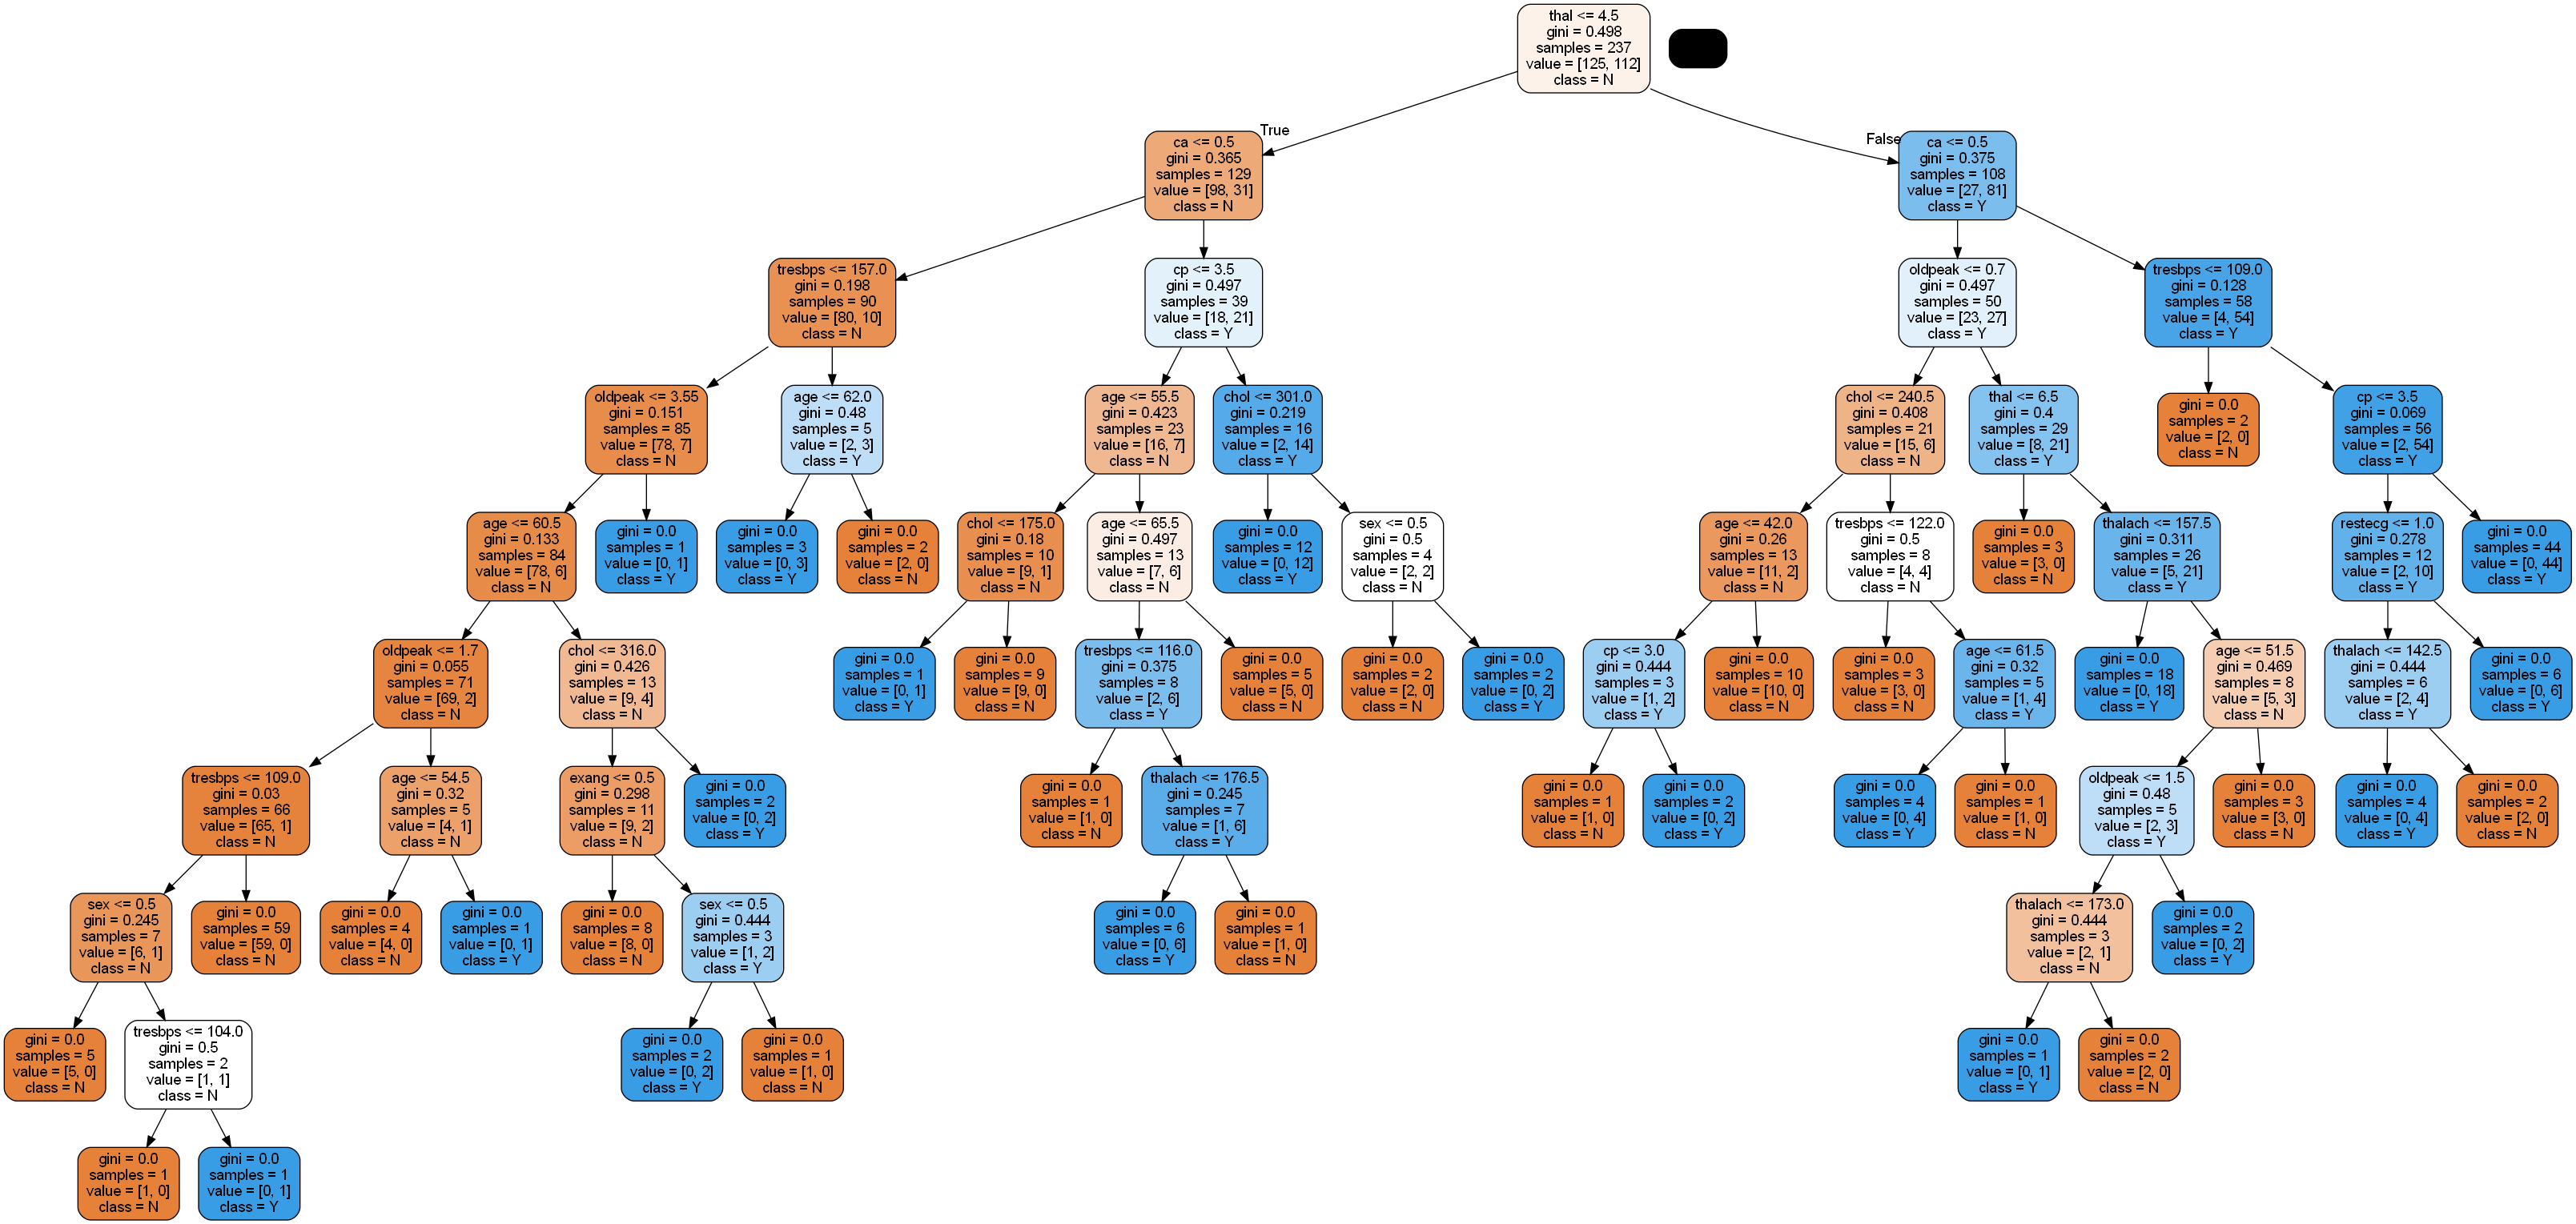

In [36]:
dot_data = export_graphviz(ds_gini, out_file=None, feature_names=list(X.columns.values),
                          class_names=['N','Y'], rounded=True, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [37]:
ds_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=5)

ds_gini.fit(X_train, Y_train)

y_pred = ds_gini.predict(X_test)

print("Actual: {}".format(np.array(Y_test)))
print("Predicted: {}".format(y_pred))
print()

g3_score = ds_gini.score(X_test, Y_test)

print("Gini Decision Tree (Max Depth 3) Accuracy Score: {}".format(round(g3_score, 3)))
print()

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print()

print(classification_report(Y_test, y_pred))

Actual: [1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0]
Predicted: [1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0]

Gini Decision Tree (Max Depth 3) Accuracy Score: 0.85

Confusion Matrix:
[[30  5]
 [ 4 21]]

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.81      0.84      0.82        25

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



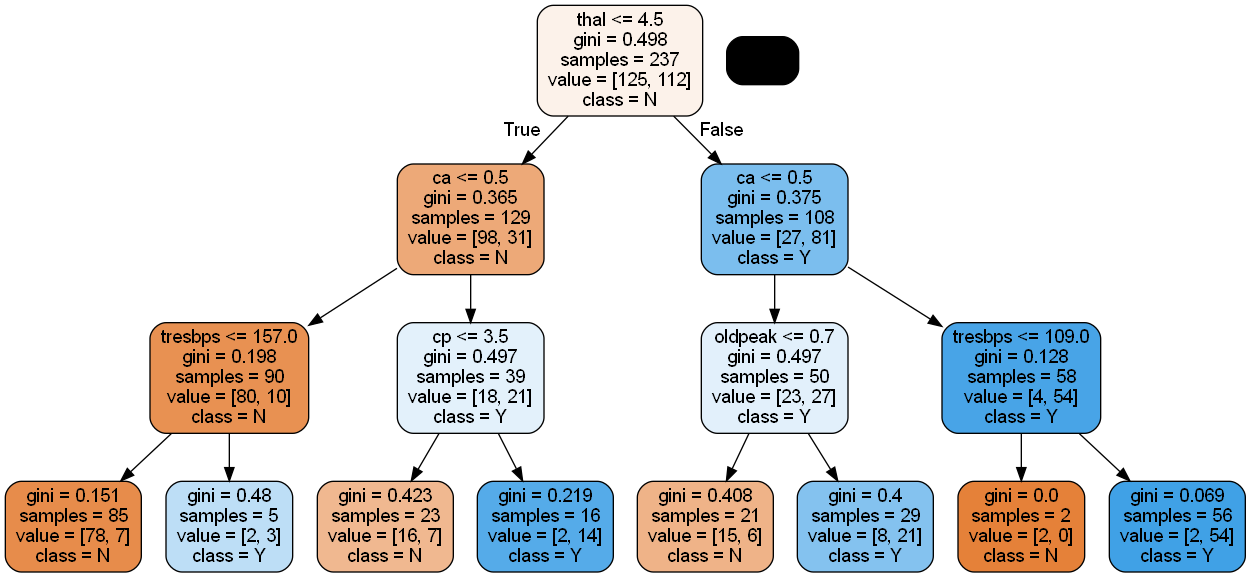

In [38]:
dot_data = export_graphviz(ds_gini, out_file=None, feature_names=list(X.columns.values),
                          class_names=['N','Y'], rounded=True, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [39]:
ds_entropy = DecisionTreeClassifier(criterion='entropy', random_state=5)

ds_entropy.fit(X_train, Y_train)

y_pred = ds_entropy.predict(X_test)

print("Actual: {}".format(np.array(Y_test)))
print("Predicted: {}".format(y_pred))
print()

e_score = ds_entropy.score(X_test, Y_test)

print("Entropy Decision Tree Accuracy Score: {}".format(round(e_score, 3)))
print()

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print()

print(classification_report(Y_test, y_pred))

Actual: [1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0]
Predicted: [0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0]

Entropy Decision Tree Accuracy Score: 0.783

Confusion Matrix:
[[28  7]
 [ 6 19]]

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.73      0.76      0.75        25

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



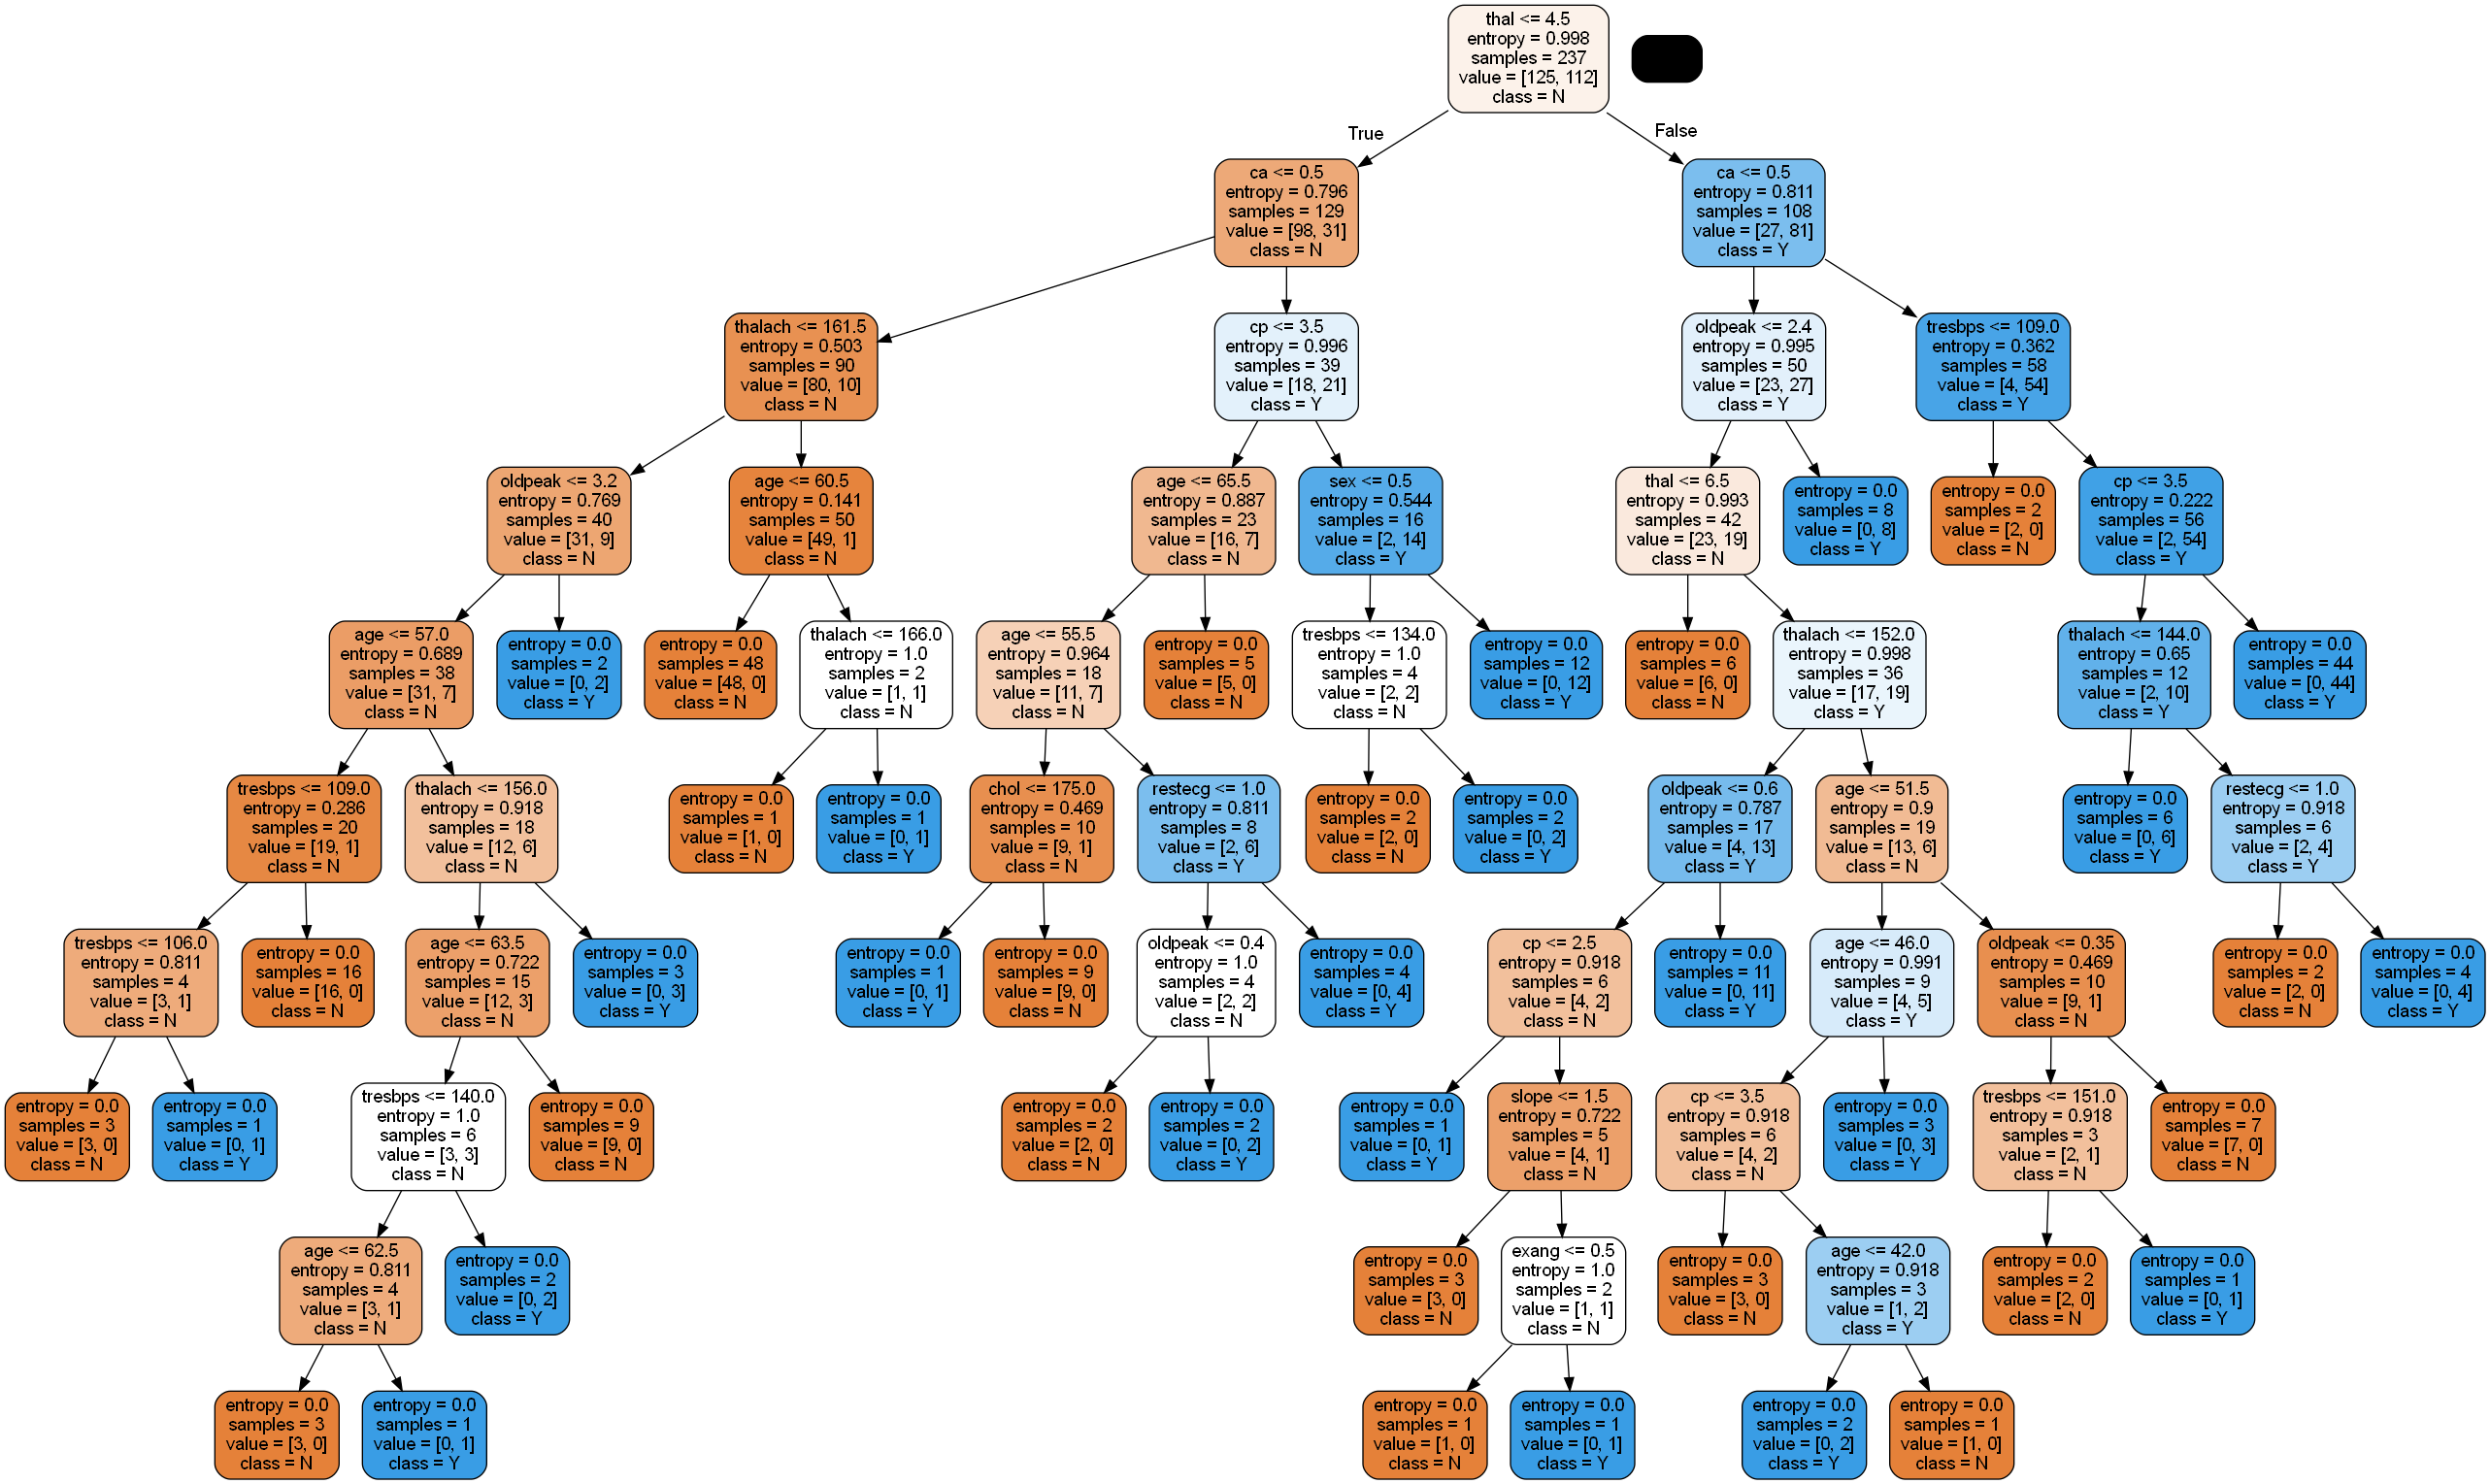

In [40]:
dot_data = export_graphviz(ds_entropy, out_file=None, feature_names=list(X.columns.values),
                          class_names=['N','Y'], rounded=True, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [41]:
ds_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=5)

ds_entropy.fit(X_train, Y_train)

y_pred = ds_entropy.predict(X_test)

print("Actual: {}".format(np.array(Y_test)))
print("Predicted: {}".format(y_pred))
print()

e3_score = ds_entropy.score(X_test, Y_test)

print("Entropy Decision Tree (Max Depth 3) Accuracy Score: {}".format(round(e3_score, 3)))
print()

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print()

print(classification_report(Y_test, y_pred))

Actual: [1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0]
Predicted: [1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0]

Entropy Decision Tree (Max Depth 3) Accuracy Score: 0.8

Confusion Matrix:
[[31  4]
 [ 8 17]]

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        35
           1       0.81      0.68      0.74        25

    accuracy                           0.80        60
   macro avg       0.80      0.78      0.79        60
weighted avg       0.80      0.80      0.80        60



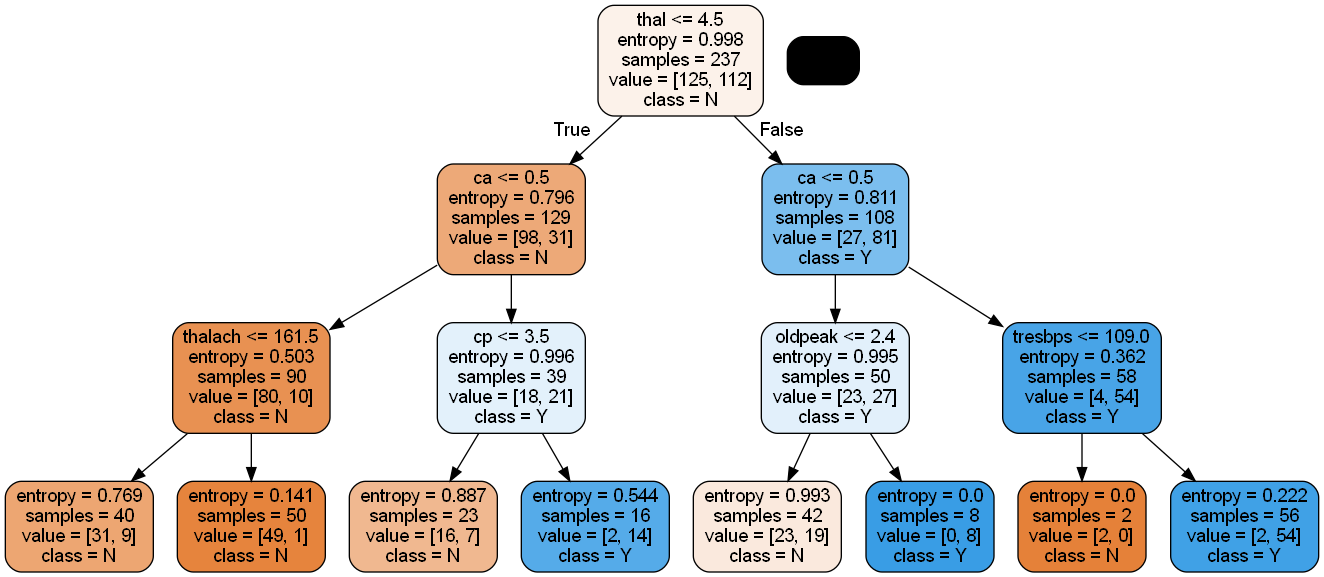

In [42]:
dot_data = export_graphviz(ds_entropy, out_file=None, feature_names=list(X.columns.values),
                          class_names=['N','Y'], rounded=True, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [46]:
print("From the results we can see that the Gini tree with Max Depth 3 (accuracy 0.85) performs the best when predicting the testing data")
print("This implies that setting the max depth of the tree helped prevent overfitting of the training data, leading to better predictions")
print()
print('In general, Gini performed better than Entropy in both cases.')

From the results we can see that the Gini tree with Max Depth 3 (accuracy 0.85) performs the best when predicting the testing data
This implies that setting the max depth of the tree helped prevent overfitting of the training data, leading to better predictions

In general, Gini performed better than Entropy in both cases.
